# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [ ]:
df_norm = pd.read_csv("../data/df_normalized_encoded.csv")
df_main = pd.read_csv("../data/asteroid_cleaned.csv")

# Data Cleaning

In [6]:
df_norm.columns = ['semi_major_axis', 'eccentricity', 'inclination', 'longitude_node',
       'perihelion', 'perihelion_distance', 'aphelion_distance',
       'orbital_period', 'data_arc', 'n_obs_used', 'absolute_magnitude',
       'albedo', 'min_orbit_intersection', 'mean_motion',
       'mean_anomaly', 'near_earth_object_N', 'near_earth_object_Y',
       'physical_hazardous_asteroid_N', 'physical_hazardous_asteroid_Y',
       'diameter']

df_norm.drop(['near_earth_object_N', 'near_earth_object_Y',
       'physical_hazardous_asteroid_N', 'physical_hazardous_asteroid_Y'], axis=1, inplace=True)

df_norm.to_csv("../data/df_normalized_encoded.csv", index=False)

df_norm.columns = ['semi_major_axis', 'eccentricity', 'inclination', 'long_node',
       'perihelion', 'perihelion_dist', 'aphelion_dist',
       'orbital_per', 'data_arc', 'n_obs_used', 'abs_mag',
       'albedo', 'min_orbit_int', 'mean_motion',
       'mean_anomaly','diameter']

# EDA

## Correlation Heatmap

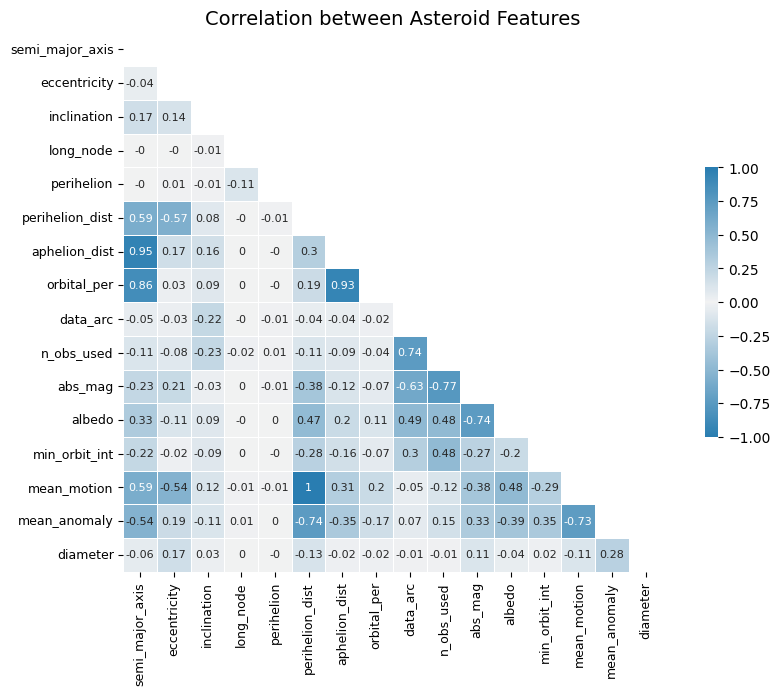

In [75]:
cmap = sns.diverging_palette(240, 240, s=90, as_cmap=True)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df_norm.corr(), dtype=bool))

plt.figure(figsize=(11,7))
ax = sns.heatmap(df_norm.corr().round(decimals=2), cmap=cmap, linewidths=.7,
            annot=True, annot_kws={"size": 8},
            cbar_kws={"shrink": .5}, square=True,
            vmin=-1, vmax=1, mask = mask)

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.title("Correlation between Asteroid Features", fontsize=14)
plt.savefig('../images/heatmap_yes_col.png', dpi=300, bbox_inches='tight')

## Correlation Analysis

In [8]:
df_main.columns = ['semi_major_axis', 'eccentricity', 'inclination', 'longitude_node',
       'perihelion', 'perihelion_distance', 'aphelion_distance',
       'orbital_period_years', 'data_arc', 'n_obs_radar_total',
       'absolute_magnitude', 'NEO',
       'PHA', 'diameter', 'albedo',
       'min_orbit_intersection', 'mean_motion', 'mean_anomaly']

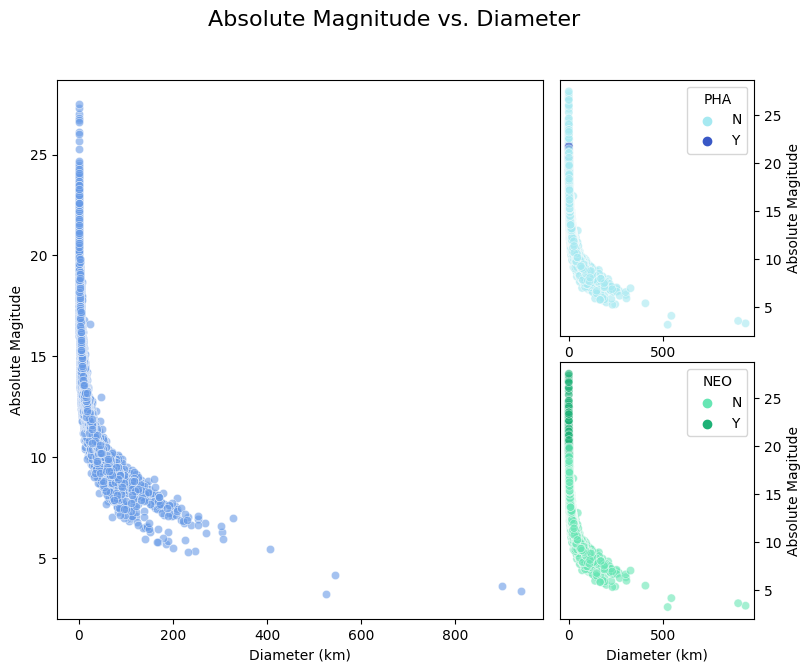

In [9]:
fig,ax = plt.subplots(2,2, figsize=(9,7), gridspec_kw={'width_ratios': [2.5,1]}, )
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2,2,(1,3), ylabel='Absolute Magitude', xlabel='Diameter (km)')
sns.scatterplot(data=df_main, y='absolute_magnitude', x='diameter', alpha=.6, color='#679AE6')
plt.suptitle("Absolute Magnitude vs. Diameter", fontsize=16)

plt.subplot(2,2,2, ylabel='Absolute Magitude', xlabel='Diameter (km)')
sns.scatterplot(data=df_main, y='absolute_magnitude', x='diameter', hue='PHA', alpha=.6, 
                palette=['#A6E9F1', '#3958C6'],)
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")

plt.subplot(2,2,4, ylabel='Absolute Magitude', xlabel='Diameter (km)')
sns.scatterplot(data=df_main, y='absolute_magnitude', x='diameter', hue='NEO', alpha=.6, 
                palette=['#67E6B4', '#1DB176'])
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")

plt.savefig('../images/abs_mag_diameter.png', dpi=300, bbox_inches='tight')

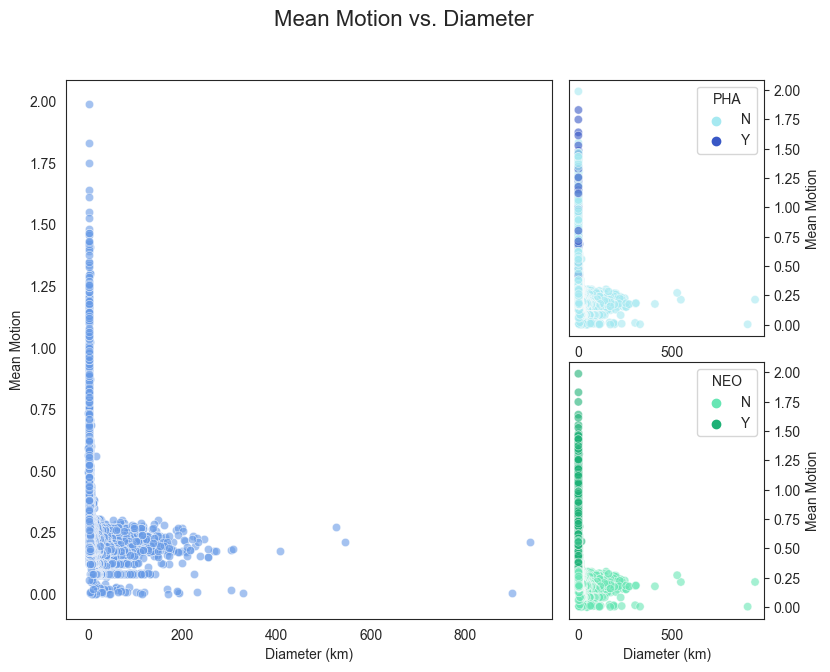

In [10]:
sns.set_style("white")
fig,ax = plt.subplots(2,2, figsize=(9,7), gridspec_kw={'width_ratios': [2.5,1]}, )
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2,2,(1,3), ylabel='Mean Motion', xlabel='Diameter (km)')
sns.scatterplot(data=df_main, y='mean_motion', x='diameter', alpha=.6, color='#679AE6')
plt.suptitle("Mean Motion vs. Diameter", fontsize=16)

plt.subplot(2,2,2, ylabel='Mean Motion', xlabel='Diameter (km)')
sns.scatterplot(data=df_main, y='mean_motion', x='diameter', hue='PHA', alpha=.6, 
                palette=['#A6E9F1', '#3958C6'])
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")

plt.subplot(2,2,4, ylabel='Mean Motion', xlabel='Diameter (km)')
sns.scatterplot(data=df_main, y='mean_motion', x='diameter', hue='NEO', alpha=.6, 
                palette=['#67E6B4', '#1DB176'])
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")

plt.savefig('../images/mean_mot_diameter.png', dpi=300, bbox_inches='tight')